In [1]:
import pandas as pd
from plotnine import *

In [2]:
# results_df = pd.read_csv('structures_experiment_results_1.csv')
results_df = pd.read_csv('./experiment_results/long_chain_results_sin1.csv')

In [3]:
results_df['cat_retries'] = pd.Categorical(results_df['retries']).rename_categories({100: 'Fail'})
# results_df['fraction'] = results_df['reqs'] / (365*24*60*60)
results_df['fraction'] = results_df['reqs'] / (365*24*60*60/2) # For sin stuff
min_max_per_exp = results_df.groupby(['vendor', 'experiment', 'cat_retries'])['fraction'].agg(['min', 'max', 'mean']).reset_index().fillna(0)

In [4]:
results_df

,Unnamed: 0,vendor,reqs,retries,iteration,experiment,cat_retries,fraction
0,0,uniform,1.499495e+07,0,0,deep chain,0,9.509732e-01
1,1,uniform,7.501410e+05,1,0,deep chain,1,4.757363e-02
2,2,uniform,2.239900e+04,2,0,deep chain,2,1.420535e-03
3,3,uniform,4.870000e+02,3,0,deep chain,3,3.088534e-05
4,4,uniform,1.100000e+01,4,0,deep chain,4,6.976154e-07
5,5,uniform,1.000000e+00,5,0,deep chain,5,6.341958e-08
6,6,uniform,1.608636e+01,100,0,deep chain,Fail,1.020190e-06
7,0,instagram,1.565882e+07,0,0,deep chain,0,9.930757e-01
8,1,instagram,1.052420e+05,1,0,deep chain,1,6.674404e-03
9,2,instagram,1.953000e+03,2,0,deep chain,2,1.238584e-04


/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: deep chain comparison.png
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: deep chain comparison.pdf
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
/home/sacheendra/miniconda3/envs/thesis/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log

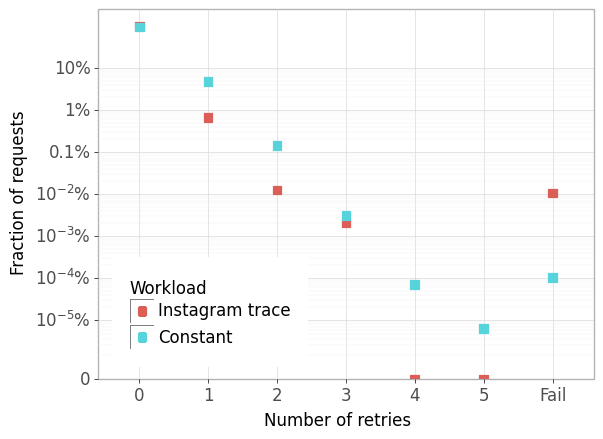

<ggplot: (8794108912409)>

In [8]:
experiment = 'deep chain'
specific_min_max = min_max_per_exp[(min_max_per_exp['experiment'] == experiment)]
plt = ggplot(specific_min_max) +\
    theme_light(base_size=12, base_family='sans-serif') +\
    theme(text=element_text(size=12), legend_position=(0.3, 0.25)) +\
    geom_point(aes(x='cat_retries', y='mean', color='vendor', group='vendor'), size=3, shape='s') +\
    scale_y_log10(limits=[1, 1e-8], breaks = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.4e-8],
                  labels=['10%', '1%', '0.1%', '$10^{-2}$%', '$10^{-3}$%', '$10^{-4}$%', '$10^{-5}$%', '0']) +\
    guides(color=guide_legend(title='Workload'), fill=guide_legend(title='Workload')) +\
    scale_color_discrete(labels=['Instagram trace', 'Constant']) +\
    xlab('Number of retries')+\
    ylab('Fraction of requests')

plt.save(f'{experiment} comparison.png', dpi=300)
plt.save(f'{experiment} comparison.pdf')
plt

In [16]:
# experiment = 'monolith'
# specific_min_max = min_max_per_exp[(min_max_per_exp['experiment'] == experiment)]
# plt = ggplot(specific_min_max) +\
#     theme_light(base_size=12, base_family='sans-serif') +\
#     theme(text=element_text(size=12)) +\
#     geom_line(aes(x='cat_retries', y='mean', color='vendor', group='vendor')) +\
#     scale_y_log10(breaks = [0.01, 0.0001, 0.000001, 1e-8], labels=['1%', '0.01%', '$10^{-4}$%', '$10^{-6}$%']) +\
#     guides(color=guide_legend(title='Workload'), fill=guide_legend(title='Workload')) +\
#     scale_color_discrete(labels=['Instagram trace', 'Constant']) +\
#     scale_fill_discrete(labels=['Instagram trace', 'Constant']) +\
#     xlab('Number of retries')+\
#     ylab('Fraction of requests')

# plt.save(f'{experiment} comparison.png', dpi=300)
# plt

In [17]:
# experiment = 'fanout'
# specific_min_max = min_max_per_exp[(min_max_per_exp['experiment'] == experiment)]
# plt = ggplot(specific_min_max) +\
#     theme_light(base_size=12, base_family='sans-serif') +\
#     theme(text=element_text(size=12)) +\
#     geom_line(aes(x='cat_retries', y='mean', color='vendor', group='vendor')) +\
#     geom_ribbon(aes(x='cat_retries', ymin='min', ymax='max', fill='vendor', group='vendor'), alpha=0.5) +\
#     scale_y_log10(breaks = [0.01, 0.0001, 0.000001], labels=['1%', '0.01%', '0.0001%']) +\
#     guides(color=guide_legend(title='Workload'), fill=guide_legend(title='Workload')) +\
#     scale_color_discrete(labels=['Instagram trace', 'Constant']) +\
#     scale_fill_discrete(labels=['Instagram trace', 'Constant']) +\
#     xlab('Number of retries')+\
#     ylab('Fraction of requests')

# plt.save(f'{experiment} comparison.png', dpi=300)
# plt

In [19]:
# const_results_df = pd.read_csv('const_experiment_results_1.csv')
# const_results_df['cat_retries'] = pd.Categorical(const_results_df['retries']).rename_categories({100: 'Fail'})
# const_results_df['cat_prob'] = pd.Categorical(const_results_df['prob']).rename_categories({100: 'Fail'})
# const_results_df['fraction'] = const_results_df['reqs'] / (365*24*60*60)
# const_results_df.columns

In [20]:
# experiment = 'deep chain'
# specific_const_results = const_results_df[(const_results_df['experiment'] == experiment)]
# plt = ggplot(specific_const_results) +\
#     theme_light(base_size=12, base_family='sans-serif') +\
#     theme(text=element_text(size=12)) +\
#     geom_line(aes(x='cat_retries', y='fraction', color='cat_prob', group='cat_prob')) +\
#     scale_y_log10(limits=[1, 1e-6], breaks = [0.01, 0.0001, 0.000001, 1e-8], labels=['1%', '0.01%', '$10^{-4}$%', '$10^{-6}$%']) +\
#     guides(color=guide_legend(title='Workload'), fill=guide_legend(title='Workload')) +\
#     xlab('Number of retries')+\
#     ylab('Fraction of requests')

# plt.save(f'const comparison.png', dpi=300)
# plt

In [21]:
# experiment = 'deep chain'
# specific_const_results = const_results_df[(const_results_df['experiment'] == experiment) & (const_results_df['cat_prob'] == 0.01)]
# plt = ggplot(specific_const_results) +\
#     theme_light(base_size=12, base_family='sans-serif') +\
#     theme(text=element_text(size=12), axis_text_y=element_text(size=35)) +\
#     geom_point(aes(x='cat_retries', y='fraction', group='cat_prob'), size=3, shape='s') +\
#     scale_y_log10(limits=[1, 1e-6], breaks = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
#                   labels=['10%', '', '0.1%', '', '$10^{-3}$%', '']) +\
#     xlab('')+\
#     ylab('')

# plt.save(f'low const.png', dpi=300)
# plt.save(f'low const.pdf')
# plt

In [22]:
# experiment = 'deep chain'
# specific_const_results = const_results_df[(const_results_df['experiment'] == experiment) & (const_results_df['cat_prob'] == 0.25)]
# plt = ggplot(specific_const_results) +\
#     theme_light(base_size=12, base_family='sans-serif') +\
#     theme(text=element_text(size=12)) +\
#     geom_point(aes(x='cat_retries', y='fraction', group='cat_prob'), size=3, shape='s') +\
#     scale_y_log10(limits=[1, 1e-6], breaks = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
#                   labels=['', '', '', '', '', '']) +\
#     xlab('')+\
#     ylab('')

# plt.save(f'25 const.png', dpi=300)
# plt.save(f'25 const.pdf')
# plt

In [23]:
# experiment = 'deep chain'
# specific_const_results = const_results_df[(const_results_df['experiment'] == experiment) & (const_results_df['cat_prob'] == 0.5)]
# plt = ggplot(specific_const_results) +\
#     theme_light(base_size=12, base_family='sans-serif') +\
#     theme(text=element_text(size=12)) +\
#     geom_point(aes(x='cat_retries', y='fraction', group='cat_prob'), size=3, shape='s') +\
#     scale_y_log10(limits=[1, 1e-6], breaks = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
#                   labels=['', '', '', '', '', '']) +\
#     xlab('')+\
#     ylab('')

# plt.save(f'50 const.png', dpi=300)
# plt.save(f'50 const.pdf')
# plt

In [24]:
# experiment = 'deep chain'
# specific_const_results = const_results_df[(const_results_df['experiment'] == experiment) & (const_results_df['cat_prob'] == 0.75)]
# plt = ggplot(specific_const_results) +\
#     theme_light(base_size=12, base_family='sans-serif') +\
#     theme(text=element_text(size=12)) +\
#     geom_point(aes(x='cat_retries', y='fraction', group='cat_prob'), size=3, shape='s') +\
#     scale_y_log10(limits=[1, 1e-6], breaks = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
#                   labels=['', '', '', '', '', '']) +\
#     xlab('')+\
#     ylab('')

# plt.save(f'75 const.png', dpi=300)
# plt

In [25]:
# print(pd.pivot_table(min_max_per_exp[['vendor', 'experiment', 'cat_retries', 'mean']], values='mean', index=['vendor', 'experiment'], columns=['cat_retries']).to_latex(float_format="{:0.2e}".format))